In [54]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to one-hot encoding for multi-class classification
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

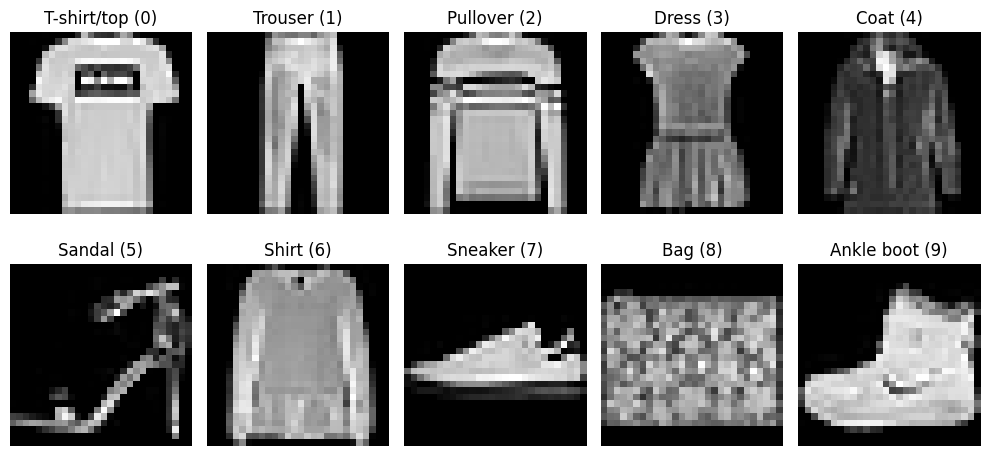

In [56]:
# Fashion MNIST label names
label_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Create a figure for the matrix form (2x5 grid)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Get the unique labels (0-9) and an example for each
unique_labels = np.unique(y_train)
examples = []

for label in unique_labels:
    # Find the index of the first occurrence of each label
    idx = np.where(y_train == label)[0][0]
    examples.append((X_train[idx], label))

# Plot each example in the grid
for i, ax in enumerate(axes.flat):
    img, label = examples[i]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{label_names[label]} ({label})")
    ax.axis('off')  # Turn off the axis

plt.tight_layout()
plt.show()

In [57]:
# Build a Feed-Forward Neural Network (FFNN) model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to 784-dim vector
    Dense(128, activation='relu'),
    Dropout(0.3),  # First hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),
    Dropout(0.3),  # Second hidden layer with 64 neurons and ReLU activation
    Dense(32, activation='relu'),
    Dropout(0.3),  # Third hidden layer with 32 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 classes for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test, y_test_cat), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3), tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 0.95 ** epoch)])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7696 - accuracy: 0.7278 - val_loss: 0.4722 - val_accuracy: 0.8242 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5316 - accuracy: 0.8168 - val_loss: 0.4728 - val_accuracy: 0.8304 - lr: 9.5000e-04
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4796 - accuracy: 0.8357 - val_loss: 0.4302 - val_accuracy: 0.8426 - lr: 9.0250e-04
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4480 - accuracy: 0.8443 - val_loss: 0.4077 - val_accuracy: 0.8522 - lr: 8.5737e-04
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4292 - accuracy: 0.8518 - val_loss: 0.3910 - val_accuracy: 0.8567 - lr: 8.1451e-04
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4141 - accuracy: 0.8558 - val_loss: 0.3805 - val_accuracy: 0.8657 - lr: 7.7378e-04
Epoch 7/10
1875/1875 [=============

313/313 [==============================] - 1s 4ms/step - loss: 0.3600 - accuracy: 0.8731
Test Accuracy: 87.31%


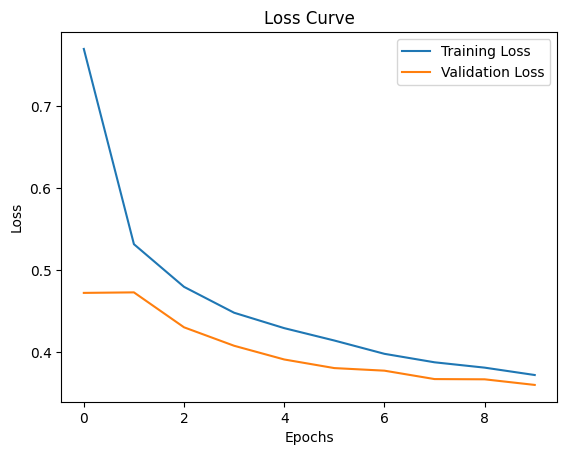

In [58]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
fashion_mnist_classes = [
    "T-shirt/top", 
    "Trouser", 
    "Pullover", 
    "Dress", 
    "Coat", 
    "Sandal", 
    "Shirt", 
    "Sneaker", 
    "Bag", 
    "Ankle boot"
]
# Generate classification report and confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=fashion_mnist_classes))
print(confusion_matrix(y_test, y_pred))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.86      0.83      1000
     Trouser       1.00      0.95      0.97      1000
    Pullover       0.80      0.76      0.78      1000
       Dress       0.86      0.90      0.88      1000
        Coat       0.80      0.74      0.77      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.64      0.67      0.66      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

[[858   0   8  31   1   1  96   0   5   0]
 [  4 955   2  30   4   0   3   0   2   0]
 [ 22   0 763   9 102   0 104   0   0   0]
 [ 30   3   3 900  30   0  31   0   3   0]
 [  0   1  95 

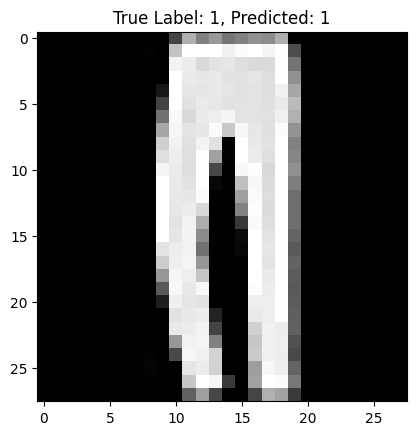

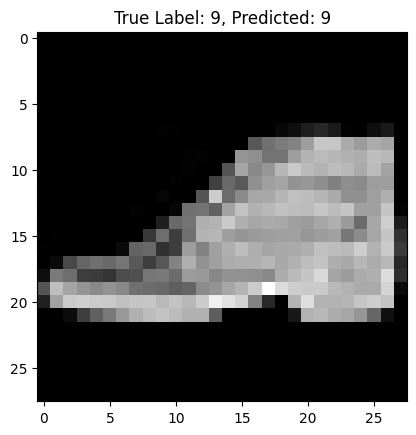

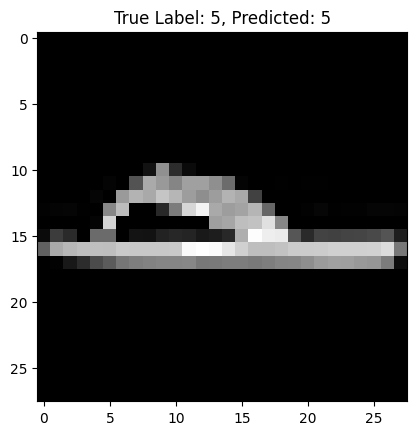

In [60]:
# Show some example predictions
for i in [2,456,567]:
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True Label: {y_test[i]}, Predicted: {y_pred[i]}")
    plt.show()